In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('./data/data.csv', index_col=False)
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
# convert diagnosis column so that M = 1, B = 0
df.diagnosis = df.diagnosis.apply(lambda x: '1' if x == 'M' else '0')
df = df.set_index('id')
del df['Unnamed: 32']
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
train_X, test_X, train_y, text_y = train_test_split(X, y, test_size=0.2)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
models = []
models.append(('tree', DecisionTreeClassifier()))
models.append(('svm', SVC()))
models.append(('knn', KNeighborsClassifier()))

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def compare_models(models, num_folds=10):
    results = {}
    for name, model in models:
        kfold = KFold(n_splits=num_folds)
        cv_results = cross_val_score(model, train_X, train_y, cv=kfold, scoring='accuracy')
        results[name] = cv_results
    return results

def gen_com_box_plot(results):
    df_results = pd.DataFrame(results)
    df_results.plot.box()
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Performance')
    plt.show()

def analyze(models, X, y):
    train_X, test_X, train_y, text_y = train_test_split(X, y, test_size=0.2)
    return gen_com_box_plot(compare_models(models))
    
    

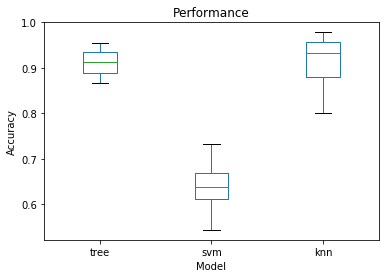

In [43]:
analyze(models, X, y)


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
pipelines = []
pipelines.append(('scaled_tree', Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())])))
pipelines.append(('scaled_svm', Pipeline([('scaler', StandardScaler()), ('svm', SVC())])))
pipelines.append(('scaled_knn', Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])))

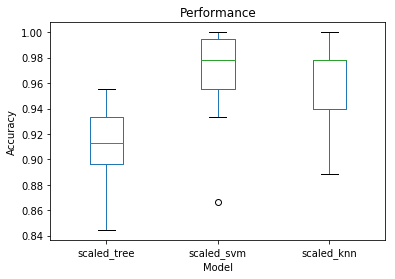

In [48]:
analyze(pipelines, X, y)